# Διανύσματα, Πίνακες και Βασικές Πράξεις

In [1]:
import numpy as np

In [2]:
#####create the array#####
A = np.array([[1,0,1],[2,1,0],[3,1,0],[0,4,5]])
#####display the array#####
print(A)

[[1 0 1]
 [2 1 0]
 [3 1 0]
 [0 4 5]]


In [3]:
######type of data#######
print(A.dtype)
########shape#########
print(A.shape)

int32
(4, 3)


In [4]:
######transpose#######
print(A.T)
#######shape########
print(A.T.shape)

[[1 2 3 0]
 [0 1 1 4]
 [1 0 0 5]]
(3, 4)


In [5]:
#######define A and B#######
A=np.array([[4,2,2],[3,5,6],[2,2,3],[8,10,9]])
B=np.array([[2,2,2],[1,3,1],[2,1,10],[4,5,5]])
#####display elementwise modulo########
print(A%B)

[[0 0 0]
 [0 2 0]
 [0 0 3]
 [0 0 4]]


In [12]:
#######define A and B#######
A=np.array([[4,2,2],[3,5,6],[2,2,3],[8,10,9]])
B=np.array([[2,2,2],[1,3,1],[2,1,10],[4,5,5]]).T
###calculate matrix product###
print(np.matmul(A,B))

[[ 16  12  30  36]
 [ 28  24  71  67]
 [ 14  11  36  33]
 [ 54  47 116 127]]


In [40]:
######define two vectors##########
x = np.array([1,2,1])
y = np.array([3,0,1])
####do we get the same result?####
print(np.dot(y,x)==np.dot(x,y))
######what is that result?########
print(np.dot(x,y))

True
4
(3,)


In [48]:
x = np.array([1,2,1])
print(x.T)
y = np.array([[3],[0],[1]])
print(x)
# print(x.shape)
# print(y)
# print(y.shape)

[1 2 1]
[1 2 1]


# Επίλυση γραμμικού συστήματος

In [4]:
from numpy.linalg import solve
import numpy as np
######define the system#######
A = np.array([[2,1],[3,1]])
b = np.array([1,1])
####print the variable vector#####
print(solve(A,b))

[0. 1.]


In [6]:
from numpy.linalg import inv
from numpy import matmul
######define the system#######
A = np.array([[2,1],[3,1]])
b = np.array([1,1])
####calculate solution vector x#####
x = matmul(inv(A),b)
print(x)

[1.11022302e-16 1.00000000e+00]


In [9]:
####round to fifth decimal#####
print(x.round(5))

[0. 1.]


In [11]:
from numpy.linalg import det
A = np.array([[2,1],[3,1]])
print(det(A))

-1.0000000000000002


In [1]:
import numpy as np

######define the system######
A = np.array([[1,2,-3],[3,-1,4],[-2,1,1]])
b = np.array([[7,6,1]])
######define the augmented matrix#######
augmat = np.concatenate((A,b.T),axis=1)
print(augmat)

[[ 1  2 -3  7]
 [ 3 -1  4  6]
 [-2  1  1  1]]


In [2]:
#####pickUpfunction######
def pick_up(the_array,get_row,give_row):
    the_row = the_array[get_row]
    to_return = np.zeros(the_array.shape)
    for x in range(len(the_row)):
        to_return[give_row,x] = the_row[x]
    return to_return

In [3]:
#####start the algorithm manually#####
i=0
j=1
ratio = augmat[j,i]/augmat[i,i]
augmat = augmat - ratio*pick_up(augmat,i,j)
print(augmat)

i=0
j=2
ratio = augmat[j,i]/augmat[i,i]
augmat = augmat - ratio*pick_up(augmat,i,j)
print(augmat)

i=1
j=2
ratio = augmat[j,i]/augmat[i,i]
augmat = augmat - ratio*pick_up(augmat,i,j)
print(augmat)

[[  1.   2.  -3.   7.]
 [  0.  -7.  13. -15.]
 [ -2.   1.   1.   1.]]
[[  1.   2.  -3.   7.]
 [  0.  -7.  13. -15.]
 [  0.   5.  -5.  15.]]
[[  1.           2.          -3.           7.        ]
 [  0.          -7.          13.         -15.        ]
 [  0.           0.           4.28571429   4.28571429]]


In [4]:
#####now substitute accordingly#######
x_3 = augmat[2,2]/augmat[2,3]

i = 1
x_2 = augmat[i,3]
j = 2
x_2 = x_2 - augmat[i,j]*x_3
x_2 = x_2/augmat[i,i]

i = 0
x_1 = augmat[i,3]
j = 1
x_1 = x_1 - augmat[i,j]*x_2
j = 2
x_1 = x_1 - augmat[i,j]*x_3
x_1 = x_1/augmat[i,i]

print(x_1,x_2,x_3)

1.9999999999999996 4.000000000000001 1.0000000000000004


In [5]:
print(np.linalg.solve(A,b[0]))

[2. 4. 1.]


# jordan

In [14]:
import numpy as np
#######divergent example#########
######define the system######
A = np.array([[1,2,-3],[3,-1,4],[-2,1,1]])
b = np.array([7,6,1])

######we start fromm the zeroth vector######
x_1 = np.array([b[0]/A[0,0],b[1]/A[1,1],b[2]/A[2,2]])
print(f"First iteration: {x_1}")

x_2 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_1[1]-A[0,2]*x_1[2]),(1/A[1,1])*(b[1]-A[1,0]*x_1[0]-A[1,2]*x_1[2]),(1/A[2,2])*(b[2]-A[2,0]*x_1[0]-A[2,1]*x_1[1])])
print(f"Second iteration: {x_2}")

x_3 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_2[1]-A[0,2]*x_2[2]),(1/A[1,1])*(b[1]-A[1,0]*x_2[0]-A[1,2]*x_2[2]),(1/A[2,2])*(b[2]-A[2,0]*x_2[0]-A[2,1]*x_2[1])])
print(f"Second iteration: {x_3}")

x_4 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_3[1]-A[0,2]*x_3[2]),(1/A[1,1])*(b[1]-A[1,0]*x_3[0]-A[1,2]*x_3[2]),(1/A[2,2])*(b[2]-A[2,0]*x_3[0]-A[2,1]*x_3[1])])
print(f"Fourth iteration: {x_4}")

x_5 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_4[1]-A[0,2]*x_4[2]),(1/A[1,1])*(b[1]-A[1,0]*x_4[0]-A[1,2]*x_4[2]),(1/A[2,2])*(b[2]-A[2,0]*x_4[0]-A[2,1]*x_4[1])])
print(f"Fifth iteration: {x_5}")

x_6 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_5[1]-A[0,2]*x_5[2]),(1/A[1,1])*(b[1]-A[1,0]*x_5[0]-A[1,2]*x_5[2]),(1/A[2,2])*(b[2]-A[2,0]*x_5[0]-A[2,1]*x_5[1])])
print(f"Sixth iteration: {x_6}")

x_7 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_6[1]-A[0,2]*x_6[2]),(1/A[1,1])*(b[1]-A[1,0]*x_6[0]-A[1,2]*x_6[2]),(1/A[2,2])*(b[2]-A[2,0]*x_6[0]-A[2,1]*x_6[1])])
print(f"Sixth iteration: {x_7}")


First iteration: [ 7. -6.  1.]
Second iteration: [22. 19. 21.]
Second iteration: [ 32. 144.  26.]
Fourth iteration: [-203.  194.  -79.]
Fifth iteration: [-618. -931. -599.]
Sixth iteration: [   72. -4256.  -304.]
Sixth iteration: [ 7607. -1006.  4401.]


In [15]:
import numpy as np
#######divergent example#########
######define the system######
A = np.array([[1,2,-3],[3,-1,4],[-2,1,1]])
b = np.array([7,6,1])

######we start fromm the zeroth vector######
x_1 = np.array([b[0]/A[0,0],b[1]/A[1,1],b[2]/A[2,2]])
print(f"First iteration: {x_1}")

x_2 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_1[1]-A[0,2]*x_1[2]),(1/A[1,1])*(b[1]-A[1,0]*x_1[0]-A[1,2]*x_1[2]),(1/A[2,2])*(b[2]-A[2,0]*x_1[0]-A[2,1]*x_1[1])])
print(f"Second iteration: {x_2}")

x_3 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_2[1]-A[0,2]*x_2[2]),(1/A[1,1])*(b[1]-A[1,0]*x_2[0]-A[1,2]*x_2[2]),(1/A[2,2])*(b[2]-A[2,0]*x_2[0]-A[2,1]*x_2[1])])
print(f"Second iteration: {x_3}")

x_4 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_3[1]-A[0,2]*x_3[2]),(1/A[1,1])*(b[1]-A[1,0]*x_3[0]-A[1,2]*x_3[2]),(1/A[2,2])*(b[2]-A[2,0]*x_3[0]-A[2,1]*x_3[1])])
print(f"Fourth iteration: {x_4}")

x_5 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_4[1]-A[0,2]*x_4[2]),(1/A[1,1])*(b[1]-A[1,0]*x_4[0]-A[1,2]*x_4[2]),(1/A[2,2])*(b[2]-A[2,0]*x_4[0]-A[2,1]*x_4[1])])
print(f"Fifth iteration: {x_5}")

x_6 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_5[1]-A[0,2]*x_5[2]),(1/A[1,1])*(b[1]-A[1,0]*x_5[0]-A[1,2]*x_5[2]),(1/A[2,2])*(b[2]-A[2,0]*x_5[0]-A[2,1]*x_5[1])])
print(f"Sixth iteration: {x_6}")

x_7 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_6[1]-A[0,2]*x_6[2]),(1/A[1,1])*(b[1]-A[1,0]*x_6[0]-A[1,2]*x_6[2]),(1/A[2,2])*(b[2]-A[2,0]*x_6[0]-A[2,1]*x_6[1])])
print(f"Sixth iteration: {x_7}")

First iteration: [ 7. -6.  1.]
Second iteration: [22. 19. 21.]
Second iteration: [ 32. 144.  26.]
Fourth iteration: [-203.  194.  -79.]
Fifth iteration: [-618. -931. -599.]
Sixth iteration: [   72. -4256.  -304.]
Sixth iteration: [ 7607. -1006.  4401.]


In [18]:
#######convergent example#########
######define the system######
A = np.array([[5,-2,3],[-3,9,1],[2,-1,-7]])
b = np.array([-1,2,3])

######we start fromm the zeroth vector######
x_1 = np.array([b[0]/A[0,0],b[1]/A[1,1],b[2]/A[2,2]])
print(f"First iteration: {x_1}")

x_2 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_1[1]-A[0,2]*x_1[2]),(1/A[1,1])*(b[1]-A[1,0]*x_1[0]-A[1,2]*x_1[2]),(1/A[2,2])*(b[2]-A[2,0]*x_1[0]-A[2,1]*x_1[1])])
print(f"Second iteration: {x_2}")

x_3 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_2[1]-A[0,2]*x_2[2]),(1/A[1,1])*(b[1]-A[1,0]*x_2[0]-A[1,2]*x_2[2]),(1/A[2,2])*(b[2]-A[2,0]*x_2[0]-A[2,1]*x_2[1])])
print(f"Second iteration: {x_3}")

x_4 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_3[1]-A[0,2]*x_3[2]),(1/A[1,1])*(b[1]-A[1,0]*x_3[0]-A[1,2]*x_3[2]),(1/A[2,2])*(b[2]-A[2,0]*x_3[0]-A[2,1]*x_3[1])])
print(f"Fourth iteration: {x_4}")

x_5 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_4[1]-A[0,2]*x_4[2]),(1/A[1,1])*(b[1]-A[1,0]*x_4[0]-A[1,2]*x_4[2]),(1/A[2,2])*(b[2]-A[2,0]*x_4[0]-A[2,1]*x_4[1])])
print(f"Fifth iteration: {x_5}")

x_6 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_5[1]-A[0,2]*x_5[2]),(1/A[1,1])*(b[1]-A[1,0]*x_5[0]-A[1,2]*x_5[2]),(1/A[2,2])*(b[2]-A[2,0]*x_5[0]-A[2,1]*x_5[1])])
print(f"Sixth iteration: {x_6}")

x_7 = np.array([(1/A[0,0])*(b[0]-A[0,1]*x_6[1]-A[0,2]*x_6[2]),(1/A[1,1])*(b[1]-A[1,0]*x_6[0]-A[1,2]*x_6[2]),(1/A[2,2])*(b[2]-A[2,0]*x_6[0]-A[2,1]*x_6[1])])
print(f"Sixth iteration: {x_7}")

First iteration: [-0.2         0.22222222 -0.42857143]
Second iteration: [ 0.14603175  0.2031746  -0.51746032]
Second iteration: [ 0.19174603  0.32839506 -0.41587302]
Fourth iteration: [ 0.18088183  0.33234568 -0.42070043]
Fifth iteration: [ 0.18535853  0.32926066 -0.42436886]
Sixth iteration: [ 0.18632558  0.33116049 -0.42264909]
Sixth iteration: [ 0.18605365  0.33129176 -0.42264419]


In [1]:
import numpy as np
import numpy.linalg as lin

# define example matrix
A = np.array([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

# factorize
###calculate eigenvalues and the corresponding eigenvectors###
values, vectors = lin.eig(A)

######we create the 
P = vectors.T
D = np.diag(values)

print(f'The eigenvalues per column:{values}')
print(f'The corresponding eigenvectors:\n{P}')

The eigenvalues:[ 1.61168440e+01 -1.11684397e+00 -3.38433605e-16]
The corresponding eigenvectors:
[[-0.23197069 -0.52532209 -0.8186735 ]
 [-0.78583024 -0.08675134  0.61232756]
 [ 0.40824829 -0.81649658  0.40824829]]


In [2]:
print(lin.inv(P)@D@P)

[[1. 4. 7.]
 [2. 5. 8.]
 [3. 6. 9.]]


# LU

In [3]:
from numpy import array
from scipy.linalg import lu

# define a square matrix
A = array([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

# factorize
P, L, U = lu(A)
print(P)
print(L)
print(U)

# reconstruct
print(P@L@U)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]]
[[ 7.00000000e+00  8.00000000e+00  9.00000000e+00]
 [ 0.00000000e+00  8.57142857e-01  1.71428571e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.58603289e-16]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [32]:
import numpy as np
import numpy.linalg as lin

# define matrix
M = np.array([[3,2,2],[2,3,-2]])
m , n = M.shape

# use automated svd
U, s, V = lin.svd(M)

# create sigma matrix
Sigma = np.zeros((m,n))
for i in range(np.min([m,n])):
    Sigma[i,i] = s[i]

# print components - V is already transposed
print(U)
print(Sigma)
print(V)

# check result
print(U@Sigma@V)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[5. 0. 0.]
 [0. 3. 0.]]
[[ 7.07106781e-01  7.07106781e-01  3.67439059e-16]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]
[[ 3.  2.  2.]
 [ 2.  3. -2.]]


In [43]:
# cholesky
import numpy.linalg as lin

# hermitian positive semi definite matrix
M = np.array([[3,2,2],[2,3,2],[2,2,2]])
L = lin.cholesky(M)
print(L)

# check
print(L@L.T)

[[1.73205081 0.         0.        ]
 [1.15470054 1.29099445 0.        ]
 [1.15470054 0.51639778 0.63245553]]
[[3. 2. 2.]
 [2. 3. 2.]
 [2. 2. 2.]]


# Least Square

In [6]:
import numpy.linalg as lin
import numpy as np

# data
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# we rewrite the equation as y=Ap where A=[[x 1]],p=[[m],[c]]
A = np.vstack([x, np.ones(len(x))]).T

# we put it in the function
m, c = lin.lstsq(A, y, rcond=None)[0]
m = round(m,3)
c = round(c,3)
m,c

(1.0, -0.95)

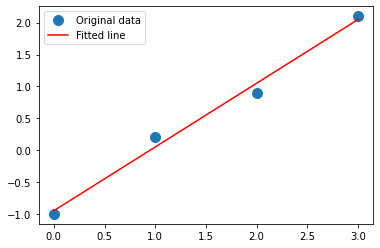

In [11]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.savefig('../pdf/figures/lsplot.png')

In [3]:
import numpy as np
import numpy.linalg as lin

# define matrix
M = np.array([[1.8,1.2],[4.4,4.6]])
m,n = M.shape

# use automated svd
U, s, V = lin.svd(M)

# create sigma matrix
Sigma = np.zeros((m,n))
for i in range(np.min([m,n])):
    Sigma[i,i] = s[i]

# print components - V is already transposed
print(f"U = {U}\n")
print(f"Sigma = {Sigma}\n")
print(f"V = {V}")

U = [[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]

Sigma = [[6.70820393 0.        ]
 [0.         0.4472136 ]]

V = [[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]


In [7]:
# choose just the first approximation
# to do that we just : sigma[1,1]=0
Sigma[1,1]=0

M_approximate = U@Sigma@V
# M_approximate has rank one thus we don't have to store all the elements of M
# we just need to store [[1],[3]] and [1.5 1.5] then matmulthem
print(M)

[[1.8 1.2]
 [4.4 4.6]]
